In [1]:
# print date
import datetime
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

2025-03-19 14:53:51


In [2]:
import xarray as xr
import dask
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os, sys, glob, re, time, math, calendar
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, spearmanr, pearsonr

# import custom functions
sys.path.append('/')
from libraries import *
from plotters import *

FIGDIR = '/Users/harishbaki/Dropbox/Apps/Overleaf/Wind_Energy_Chebyshev_based_wind_profile_evaluaiton'

- Vary surface roughness length from 1e-2 to 1 m
- Vary friction velocity from 0.1 to 2 m/s

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def wind_speed(z, u_star, z0, k=0.4):
    """
    Compute wind speed U(z) using the logarithmic wind profile.

    Parameters:
    z : float or array-like
        Height above ground (m)
    u_star : float
        Friction velocity (m/s)
    z0 : float
        Surface roughness length (m)
    k : float, optional
        von Kármán constant (default is 0.4)

    Returns:
    U : float or array-like
        Wind speed at height z (m/s)
    """
    return (u_star / k) * np.log(z / z0)

# Define range of friction velocity (u_*) and roughness length (z0)
u_star_values = np.linspace(0.1, 1.0, 100)  # 5 values from 0.1 to 2 m/s
z0_values = np.logspace(-2, 0, 100)  # 5 values from 0.01 to 1 m (log scale)
z_values = ref_H[1:]
# Create a 2D grid of u_* and z0 values
U = np.zeros((len(u_star_values), len(z0_values), z_values.size))
for i, u_star in enumerate(u_star_values):
    for j, z0 in enumerate(z0_values):
        for k, z in enumerate(z_values):
            U[i, j, k] = wind_speed(z, u_star, z0)

In [4]:
poly_order = 4
ChSh = np.zeros((len(u_star_values), len(z0_values), poly_order+1))
for i, u_star in enumerate(u_star_values):
    for j, z0 in enumerate(z0_values):
        M = U[i,j,:]
        ChSh[i,j,:] = Chebyshev_Coeff(z_values,M, poly_order=poly_order, CPtype=1, ref_H=z_values)

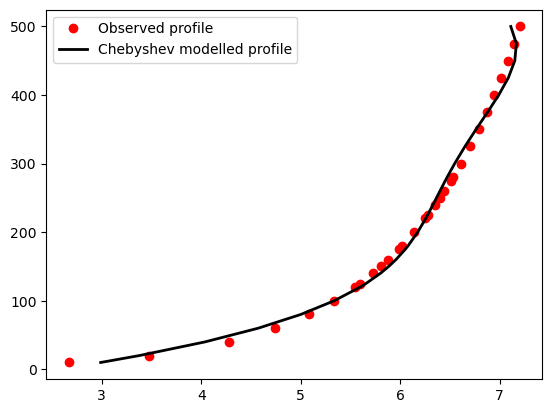

In [5]:
i,j = 40, -1
M = U[i,j,:]
Mp = WindProfile(z_values, ChSh[i,j,:], poly_order=poly_order, CPtype=1, ref_H=z_values)
plt.plot(M, z_values, 'or', markerfacecolor='r',label='Observed profile')
plt.plot(Mp, z_values, '-k', linewidth=2,label='Chebyshev modelled profile')
plt.legend()

0.9212467199609127

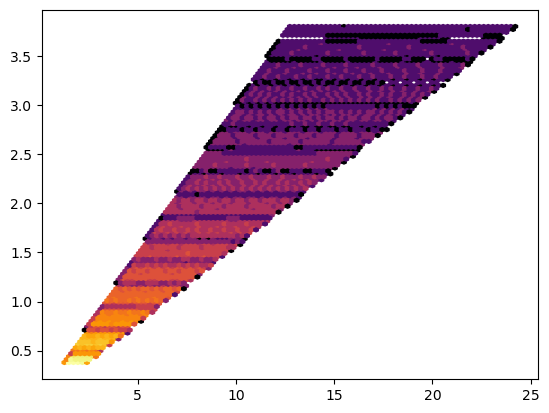

In [6]:
plt.hexbin(ChSh[:,:,0].flatten(), ChSh[:,:,1].flatten(),gridsize=100, bins='log', cmap='inferno')
np.corrcoef(ChSh[:,:,0].flatten(), ChSh[:,:,1].flatten())[0,1]

-0.9212467199609126

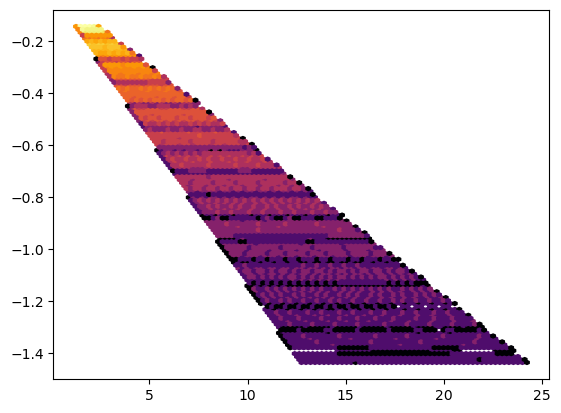

In [7]:
plt.hexbin(ChSh[:,:,0], ChSh[:,:,2], gridsize=100, bins='log', cmap='inferno')
np.corrcoef(ChSh[:,:,0].flatten(), ChSh[:,:,2].flatten())[0,1]

0.9212467199609146

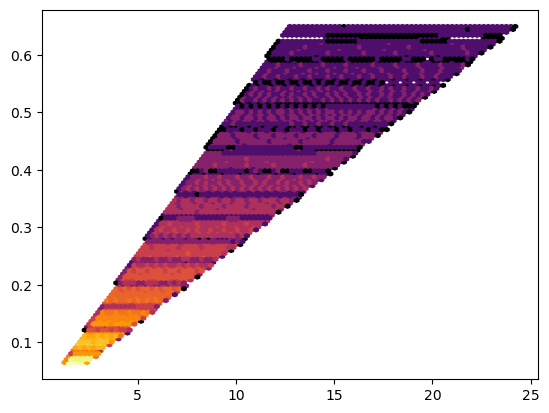

In [8]:
plt.hexbin(ChSh[:,:,0], ChSh[:,:,3], gridsize=100, bins='log', cmap='inferno')
np.corrcoef(ChSh[:,:,0].flatten(), ChSh[:,:,3].flatten())[0,1]

-0.9212467199609159

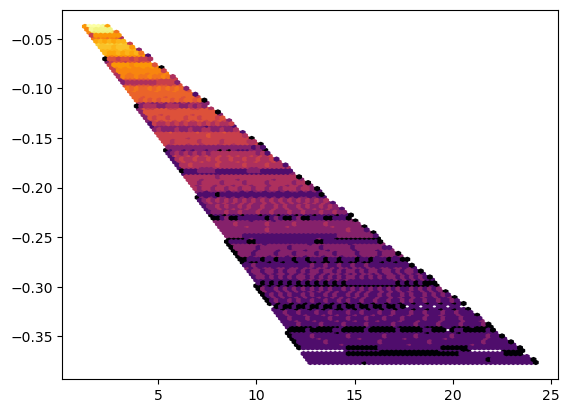

In [9]:
plt.hexbin(ChSh[:,:,0], ChSh[:,:,4], gridsize=100, bins='log', cmap='inferno')
np.corrcoef(ChSh[:,:,0].flatten(), ChSh[:,:,4].flatten())[0,1]

(-0.9999999999999956, 0.9999999999999976, -0.9999999999999988)

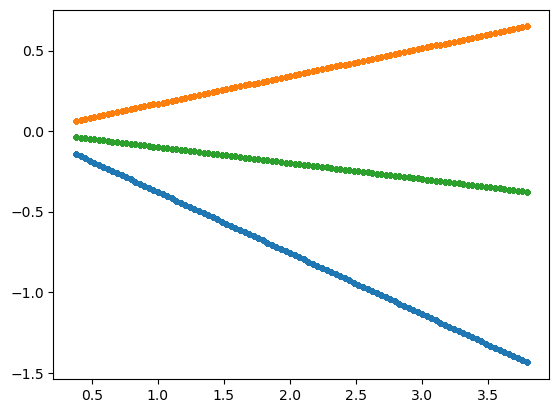

In [10]:
plt.scatter(ChSh[:,:,1], ChSh[:,:,2],marker='.')
plt.scatter(ChSh[:,:,1], ChSh[:,:,3],marker='.')
plt.scatter(ChSh[:,:,1], ChSh[:,:,4],marker='.')
np.corrcoef(ChSh[:,:,1].flatten(), ChSh[:,:,2].flatten())[0,1], np.corrcoef(ChSh[:,:,1].flatten(), ChSh[:,:,3].flatten())[0,1], np.corrcoef(ChSh[:,:,1].flatten(), ChSh[:,:,4].flatten())[0,1]

(-0.9999999999999987, 1.0)

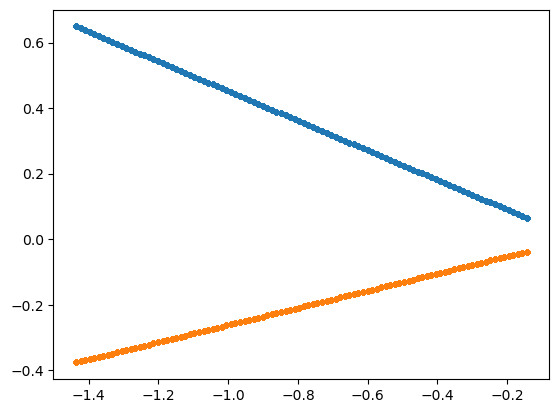

In [11]:
plt.scatter(ChSh[:,:,2], ChSh[:,:,3],marker='.')
plt.scatter(ChSh[:,:,2], ChSh[:,:,4],marker='.')
np.corrcoef(ChSh[:,:,2].flatten(), ChSh[:,:,3].flatten())[0,1], np.corrcoef(ChSh[:,:,2].flatten(), ChSh[:,:,4].flatten())[0,1]

-1.0

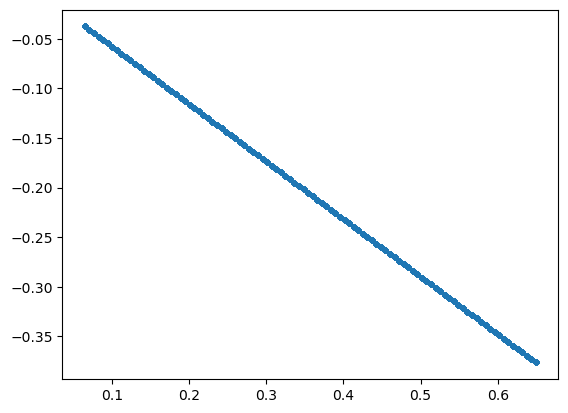

In [12]:
plt.scatter(ChSh[:,:,3], ChSh[:,:,4],marker='.')
np.corrcoef(ChSh[:,:,3].flatten(), ChSh[:,:,4].flatten())[0,1]

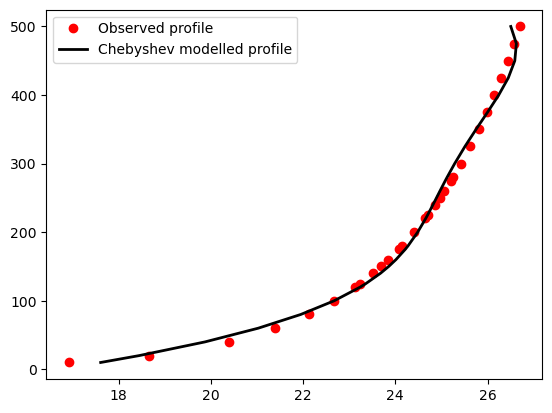

In [13]:
i, j = np.unravel_index(np.argmin(ChSh[:,:,4]), ChSh[:,:,4].shape)
M = U[i,j,:]
Mp = WindProfile(z_values, ChSh[i,j,:], poly_order=poly_order, CPtype=1, ref_H=z_values)
plt.plot(M, z_values, 'or', markerfacecolor='r',label='Observed profile')
plt.plot(Mp, z_values, '-k', linewidth=2,label='Chebyshev modelled profile')
plt.legend()

array([ 9.04239734,  1.37326536, -0.1798013 ])

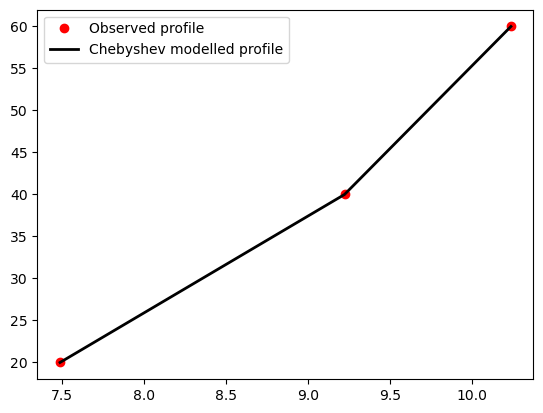

In [43]:
z_values = np.arange(20,60.1,20)
# Create a 2D grid of u_* and z0 values
M = np.zeros(z_values.size)
for k, z in enumerate(z_values):
    M[k] = wind_speed(z, 1, 1)
poly_order = 2
cheby = Chebyshev_Coeff(z_values,M, poly_order=poly_order, CPtype=1, ref_H=z_values)
Mp = WindProfile(z_values, cheby, poly_order=poly_order, CPtype=1, ref_H=z_values)
plt.plot(M, z_values, 'or', markerfacecolor='r',label='Observed profile')
plt.plot(Mp, z_values, '-k', linewidth=2,label='Chebyshev modelled profile')
plt.legend()
cheby

In [30]:
z_values

array([ 20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.])

array([ 9.2629975 ,  2.49571132, -1.01578207, -0.25445258, -0.01120145])

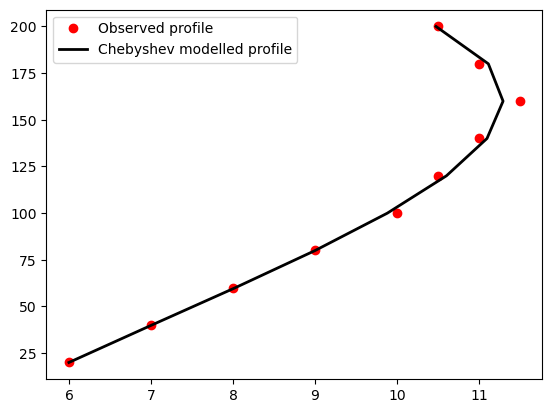

In [40]:
z_values = np.arange(20,200.1,20)
# Create a 2D grid of u_* and z0 values
M = np.array([6,7,8,9, 10, 10.5,11,11.5,11, 10.5])
poly_order = 4
cheby = Chebyshev_Coeff(z_values,M, poly_order=poly_order, CPtype=1, ref_H=z_values)
Mp = WindProfile(z_values, cheby, poly_order=poly_order, CPtype=1, ref_H=z_values)
plt.plot(M, z_values, 'or', markerfacecolor='r',label='Observed profile')
plt.plot(Mp, z_values, '-k', linewidth=2,label='Chebyshev modelled profile')
plt.legend()
cheby